In [121]:
# Import useful libraries
import pandas as pd
import os
import sys
import gensim.downloader as api
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import fasttext
import seaborn as sns
from sklearn.model_selection import train_test_split as tts

# Import functions from source folder
sys.path.append('../src/') 
from data.preprocess_keywords import make_cleaned_keywords_df
from data.make_datasets import get_data, get_daily_trending_searches
from features.build_features import get_vectors

In [141]:
# Specify wanted time range
start_date = '2019-01-01'
end_date = '2020-01-01'

# Where data files will be stored
path_to_data_files = '../data/interim/'

In [142]:
google_file = path_to_data_files + start_date + '_' + end_date + '_World_daily_trending_searches.json'

if os.path.isfile(google_file) == False:
    df_google = get_daily_trending_searches(path_to_data_files, start_date, end_date = end_date)
else:
    df_google = pd.read_json(google_file, orient ='split', compression = 'infer') 

/home/magda_d/venv/lib64/python3.7/site-packages/urllib3/connectionpool.py:1052: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
/home/magda_d/venv/lib64/python3.7/site-packages/urllib3/connectionpool.py:1052: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
/home/magda_d/venv/lib64/python3.7/site-packages/urllib3/connectionpool.py:1052: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
/home/m

2019-01-01


/home/magda_d/venv/lib64/python3.7/site-packages/urllib3/connectionpool.py:1052: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
/home/magda_d/venv/lib64/python3.7/site-packages/urllib3/connectionpool.py:1052: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


2019-01-02


/home/magda_d/venv/lib64/python3.7/site-packages/urllib3/connectionpool.py:1052: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
/home/magda_d/venv/lib64/python3.7/site-packages/urllib3/connectionpool.py:1052: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


2019-01-03


/home/magda_d/venv/lib64/python3.7/site-packages/urllib3/connectionpool.py:1052: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
/home/magda_d/venv/lib64/python3.7/site-packages/urllib3/connectionpool.py:1052: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


2019-01-04


/home/magda_d/venv/lib64/python3.7/site-packages/urllib3/connectionpool.py:1052: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
/home/magda_d/venv/lib64/python3.7/site-packages/urllib3/connectionpool.py:1052: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


2019-01-05


/home/magda_d/venv/lib64/python3.7/site-packages/urllib3/connectionpool.py:1052: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
/home/magda_d/venv/lib64/python3.7/site-packages/urllib3/connectionpool.py:1052: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


In [124]:
# Clean data file in specific date range
clean_data_file = '../data/interim/clean_keywords_' + start_date + '_' + end_date + '.json'

# Generates the clean data file if it does not exist
if os.path.isfile(clean_data_file) == False:

    # Path to raw data
    data_file = '../data/raw/CMS_2010_to_June_2022_ENGLISH.json'

    # Load and extract data within time range
    df_subset = get_data(data_file, start_date, end_date)

    # Cleans keywords and saves data as a dataframe
    make_cleaned_keywords_df(df_subset, start_date, end_date)


# Loads the clean data file
df_dw = pd.read_json(clean_data_file, orient ='split', compression = 'infer')

# Remove rows witn no category
df_dw.dropna(how='any', inplace = True)
df_dw.reset_index(drop = True, inplace = True)

In [125]:
df_dw['cleanFocusParentCategory'] = df_dw['cleanFocusParentCategory'].apply(lambda x: x.replace(' ','-'))
df_clean_single_kw=df_dw.explode('keywordStringsCleanAfterFuzz')
label=df_dw['cleanFocusParentCategory'].apply(lambda x: ('__label__' +x+' '))
kw=df_dw['keywordStringsCleanAfterFuzz'].apply(lambda x: (', '.join(x)))
label_kw=label+kw

In [117]:
import os
def save_txt(out_name,data_to_save):
    from tqdm import tqdm
    #!rm $out_name
    if os.path.isfile(out_name):
        os.remove(out_name)
    with open(out_name,'a') as f:
        for i,el in tqdm(enumerate(data_to_save)):
            print(el,file=f)
    input_file=out_name
    return input_file

In [128]:
label_kw_train,label_kw_test = tts(label_kw, random_state=0, test_size=0.33)

all_kw_train=save_txt( path_to_data_files + 'fasttext/all_kw_train.txt',label_kw_train)
all_kw_test=save_txt( path_to_data_files + 'fasttext/all_kw_test.txt',label_kw_test)

model_all_kw_check = fasttext.train_supervised(input=all_kw_train, lr=1, epoch=12)

773it [00:00, 30033.69it/s]
381it [00:00, 19735.59it/s]
Read 0M words
Number of words:  2755
Number of labels: 20
Progress: 100.0% words/sec/thread:  152449 lr:  0.000000 avg.loss:  0.324291 ETA:   0h 0m 0s


In [129]:
#prediction for list of input keywords
def run_predict_for_series(model,series_kw):
    list_of_series = []
    for selected_keyword in series_kw:
        list_of_k = [k for k in range(1,3)]
        predictions = [prediction(model,selected_keyword,k=i) for i in list_of_k]
        predictions = pd.Series(predictions, index=list_of_k, name=selected_keyword)
        list_of_series.append(predictions)

    result = pd.concat(list_of_series, axis=1).T
    return result

# function to run predictions for a single kw and 
# make list of labels 
def prediction(model, keyword,k=1):
    x=model.predict(keyword,k=k)
    list_label=[]
    for k in range(1,k+1):
        pred_label=(x[0][k-1].split('__')[2])
        list_label.append(pred_label)
        tuple_label=tuple(list_label)
    return tuple_label


#count amount of predictions for each category
def count_values_for_columns(result):
    val_counts_for_cols = {}
    for col in result.columns:
        val_counts = result.explode(col)[col].value_counts()
        val_counts_for_cols[col] = val_counts
    return val_counts_for_cols

In [130]:
#predict categories for google searches topic title+type
google_data=df_google['topic_title']+' '+df_google['topic_type']

#google_result=run_predict_for_series(model_all_kw_check,df_google_subset['topic_type']) #only topic type
#google_result=run_predict_for_series(model_all_kw_check,df_google_subset['topic_title']) #only topic title
google_result=run_predict_for_series(model_all_kw_check,google_data) #topic title+type

#count amount GS words for each category
#count_values_for_columns(google_result)[1]
data_g = count_values_for_columns(google_result)[1].values
labels_g = count_values_for_columns(google_result)[1].index

google_start_date='2021-12-31'
#make pie plot for google searches
title_g=('Pie-chart of a predicted interest from Google Search mapped onto \n'+
       ' ' +str(len(labels_g)) + ' categories between ' +google_start_date+' and ' +end_date)

In [131]:
# make df with dw categories and extracted labels
new_labels = single_kw_label.str.split('__').apply(lambda row: row[2]).str.strip()

d={'dw_cat':new_labels,'dw_kw':single_kw}#,'pred_cat1','pred_cat2','pred_cat3','pred_cat4','pred_cat5'}
df_single=pd.DataFrame(data=d)

data_dw = count_values_for_columns(df_single)['dw_cat'].values
labels_dw = count_values_for_columns(df_single)['dw_cat'].index
title=('Pie-chart of a relative amount of articles published by DW \n'+
       'among ' +str(len(labels_dw)) + ' categories between ' +start_date+' and ' +end_date)

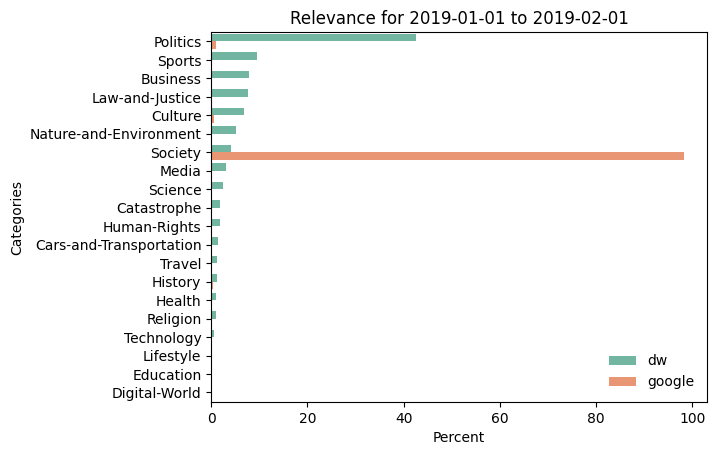

In [138]:
ds2 = pd.DataFrame({'Categories':labels_dw,'Percent':100*data_dw/data_dw.sum().round(1)})
ds1 = pd.DataFrame({'Categories':labels_g,'Percent':100*data_g/data_g.sum().round(1)})


ds2['source'] = 'dw'
ds1['source'] = 'google'
dss = pd.concat([ds2, ds1])

#sns.barplot(x='Categories', y='Percent', hue='source', data=dss, palette='Set2')
sns.barplot(x='Percent', y='Categories', hue='source', data=dss, palette='Set2')
sns.color_palette("deep")
plt.legend(loc='lower right',frameon=False)
plt.title('Relevance for ' + start_date + ' to ' + end_date)

plt.show()
